In [1]:
# Masukan Library

import numpy as np
import pandas as pd 
import re
import requests
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv')
data

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


In [3]:
data.rename(columns={'Text Tweet':'text_tweet'},inplace=True)
data.head()

,Id,Sentiment,text_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [4]:
# Cek 5 Dataset teratas
data.head()

,Id,Sentiment,text_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [5]:
# Cek 5 Dataset terbawah
data.tail()

,Id,Sentiment,text_tweet
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."
299,300,negative,Sinyal <PROVIDER_NAME> amsyong d stadion gajayana


In [6]:
# Cek attribut dataset
display(data.columns)

# Cek jumlah baris dan kolom dataset
display(data.shape)

Index(['Id', 'Sentiment', 'text_tweet'], dtype='object')

(300, 3)

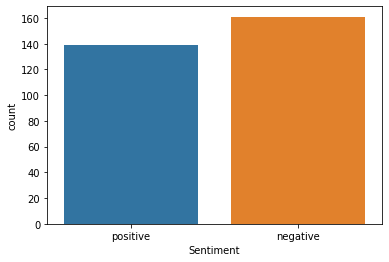

In [7]:
# Eksplorasi data
sns.countplot(x='Sentiment', data = data);

In [8]:
# Encoding

from sklearn.preprocessing import LabelEncoder 

X = data.iloc[:,2].values 
Le = LabelEncoder()
Le.fit(['positive','negative']) 

y = Le.transform(data.iloc[:,1].values)

print(list(Le.classes_))

['negative', 'positive']


In [9]:
#menghitung jumlah data masing-masing label
data["Sentiment"].value_counts()

negative    161
positive    139
Name: Sentiment, dtype: int64

In [10]:
#simpan kata-kata stopword

# f=open('stopwordlist.txt')

url = "https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt"
ina_stopword = requests.get(url).content

tempStoplist = []
for tempstp in ina_stopword.split():
  tempStoplist.append(tempstp)

In [11]:
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" #regex untuk remove punctuation

def preprocessing(tweet):
  tweet = re.sub(TEXT_CLEANING_RE,'', str(tweet).lower()).strip() #casefolding dan remove punctuation
  tokens = []
  for token in tweet.split():
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      tokens.append(token) 
  return " ".join(tokens)

In [12]:
# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia
%%time

data['clean_twt'] = data.text_tweet.apply(lambda x: preprocessing(x))
data['clean_twt'] = data.clean_twt.str.replace('rt', '')

CPU times: user 76.4 ms, sys: 1.89 ms, total: 78.3 ms
Wall time: 83.1 ms


In [16]:
#melakukan pemodelan prediksi
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score

CPU times: user 26 µs, sys: 5 µs, total: 31 µs
Wall time: 37.2 µs


In [17]:
#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(data.clean_twt).toarray()

In [18]:
vectorizer.vocabulary_

{'4g': 0,
 '4g provider_name': 1,
 'ada': 2,
 'aja': 3,
 'alhamdulillah': 4,
 'banget': 5,
 'banyak': 6,
 'bikin': 7,
 'bisa': 8,
 'boikot': 9,
 'boikot provider_name': 10,
 'buat': 11,
 'cuma': 12,
 'dan': 13,
 'dapat': 14,
 'dari': 15,
 'dari provider_name': 16,
 'data': 17,
 'dengan': 18,
 'di': 19,
 'gak': 20,
 'gratis': 21,
 'hari': 22,
 'ini': 23,
 'internet': 24,
 'jadi': 25,
 'jaringan': 26,
 'juga': 27,
 'karena': 28,
 'kau': 29,
 'ke': 30,
 'kenapa': 31,
 'kok': 32,
 'kuota': 33,
 'lagi': 34,
 'lancar': 35,
 'lebih': 36,
 'lemot': 37,
 'mahal': 38,
 'makin': 39,
 'masih': 40,
 'memang': 41,
 'pakai': 42,
 'pakai provider_name': 43,
 'paket': 44,
 'product_name': 45,
 'provider_name': 46,
 'provider_name provider_name': 47,
 'provider_name url': 48,
 'pulsa': 49,
 'saja': 50,
 'sama': 51,
 'sangat': 52,
 'saya': 53,
 'sinyal': 54,
 'sudah': 55,
 'tapi': 56,
 'tidak': 57,
 'url': 58,
 'user_mention': 59,
 'ya': 60,
 'yang': 61,
 'youtube': 62}

In [19]:
#melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [21]:
#modeling sentiment Logistic Regression
from sklearn.linear_model import LogisticRegression
t0_lr = time.time()
text_classifier_lr = LogisticRegression()
text_classifier_lr.fit(X_train, y_train)
t1_lr = time.time()

In [22]:
#modeling sentiment Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [23]:
#modeling sentiment Naive Bayes
from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()  
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [24]:
#modeling sentiment Support Vector Machine
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

In [25]:
predictions_lr = text_classifier_lr.predict(X_test)
t2_lr = time.time()
time_linear_train_lr = t1_lr-t0_lr
time_linear_predict_lr = t2_lr-t1_lr

predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("LR Training time: %fs; Prediction time: %fs" % (time_linear_train_lr, time_linear_predict_lr))
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

LR Training time: 0.019401s; Prediction time: 54.606499s
EN Training time: 0.178359s; Prediction time: 52.735955s
NB Training time: 0.001384s; Prediction time: 39.496658s
SVM Training time: 0.011591s; Prediction time: 25.072213s


In [26]:
# Result

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Logistic Regression")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_lr)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_lr)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_lr)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_lr)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_lr))
print("")
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_nb))
print("")
print("Support Vector Machine")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_svm)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_svm)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_svm)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_svm)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_svm))
print("")

Logistic Regression
Accuracy  =  76.67 %
Recall    =  70.37 %
Precision =  76.0 %
F1-Score  =  73.08 %
ROC AUC   =  0.7609427609427609

Random Forest
Accuracy  =  75.0 %
Recall    =  74.07 %
Precision =  71.43 %
F1-Score  =  72.73 %
ROC AUC   =  0.7491582491582491

Naive Bayes
Accuracy  =  80.0 %
Recall    =  74.07 %
Precision =  80.0 %
F1-Score  =  76.92 %
ROC AUC   =  0.7946127946127945

Support Vector Machine
Accuracy  =  76.67 %
Recall    =  74.07 %
Precision =  74.07 %
F1-Score  =  74.07 %
ROC AUC   =  0.7643097643097643

